1. input: F(trace), ops(setting), Fneu(neuropil), icell(is cell?) -- all from the upstream suite2p processing?
- yes, should all be found in the data folder
2. F0 = (F0 - Fb) / np.maximum(10, F00.mean(axis=1)).reshape(-1,1) ? why doing this (instead of F0-Fneu --> preprocess --> deconv)
- do not need this when using the new deconv
3. why only use Fs when applying udcnv, instead of  
- both ok

## Qingqing's Code

In [ ]:
m = 3
dat_TL = newstim.load_timeline(db[int(m)])
db0 = db[int(m)]
mname, datexp, blk = db0['mname'], db0['datexp'], db0['blk']
root1 = os.path.join('Z:/data/PROC/', mname, datexp, blk)
spks = []
snrs = []
ops = np.load(os.path.join(root1, 'suite2p', 'plane0', 'ops.npy'), allow_pickle=True).item()
Fs=np.round(ops['fs'])
V1 = [0,1,2,3]
for n in V1:
    ops = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'ops.npy'), allow_pickle=True).item()
    F0 = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'F.npy'))
    Fn = dcnv.preprocess(F0, ops['baseline'], 2 * ops['win_baseline'],
                            ops['sig_baseline'], ops['fs'] , ops['prctile_baseline'])
    F00 = F0 - Fn
    Fneu0 = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'Fneu.npy'))
    F0 = F0 - 1*Fneu0
    icell = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'iscell.npy'))[:,0]
    F0 = F0[icell>.5]
    F00 = F00[icell>.5,:]
    snr = 1  - .5 * np.var(np.diff(F0, axis=1), axis=1) / np.var(F0, axis=1)
    Fn = dcnv.preprocess(F0, ops['baseline'], 2 * ops['win_baseline'],
                ops['sig_baseline'], ops['fs'] , ops['prctile_baseline'])
    Fb = F0 - Fn
    F0 = (F0 - Fb) / np.maximum(10, F00.mean(axis=1)).reshape(-1,1)
    # F0 = dcnv.oasis(F0, ops['batch_size'], ops['tau'], ops['fs'])
    F0 = udcnv.apply(F0, Fs, 'F:/GitHub/Passive-Viewing/Analysis/from Marius/sim_right_flex.th', batch_size=1)
    spks.append(F0)
    snrs.append(snr)
# spks = np.load('Z:/data/Share/Qingqing/FX15_2024_05_13_1_07_d9.npy')
spks = np.concatenate(spks)
snrs = np.concatenate(snrs)

## Try 1 session

In [1]:
import os
import udcnv
import numpy as np
from suite2p.extraction import dcnv


In [2]:
mname, datexp, blk = 'TX88', '2022_06_13', '2'
root1 = os.path.join('/mnt/x', mname, datexp, blk)
results = {'spks': [], 'snrs': []}
ops = np.load(os.path.join(root1, 'suite2p', 'plane0', 'ops.npy'), allow_pickle=True).item()
Fs=np.round(ops['fs'])
for n in range(20):
    print(n)
    ops = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'ops.npy'), allow_pickle=True).item()
    fr_per_folder = ops['frames_per_folder']
    F0 = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'F.npy'))[:, :fr_per_folder[0]]
    #Fn = dcnv.preprocess(F0, ops['baseline'], 2 * ops['win_baseline'],
    #                        ops['sig_baseline'], ops['fs'] , ops['prctile_baseline'])
    #F00 = F0 - Fn
    Fneu0 = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'Fneu.npy'))[:, :fr_per_folder[0]]
    F0 = F0 - 1*Fneu0
    #icell = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'iscell.npy'))[:,0]
    #F0 = F0[icell>.5]
    #F00 = F00[icell>.5,:]
    snr = 1  - .5 * np.var(np.diff(F0, axis=1), axis=1) / np.var(F0, axis=1)
    Fn = dcnv.preprocess(F0, ops['baseline'], 2 * ops['win_baseline'],
                ops['sig_baseline'], ops['fs'] , ops['prctile_baseline'])
    #Fb = F0 - Fn
    #F0 = (F0 - Fb) / np.maximum(10, F00.mean(axis=1)).reshape(-1,1)
    #F0 = dcnv.oasis(F0, ops['batch_size'], ops['tau'], ops['fs'])
    F0 = udcnv.apply(Fn, Fs, 'sim_right_flex.th', batch_size=1)
    results['spks'].append(F0)
    results['snrs'].append(snr)
# spks = np.load('Z:/data/Share/Qingqing/FX15_2024_05_13_1_07_d9.npy')
#np.save(f'/home/sunr/projects/MCLabRotation/data_newDeconv/spk/{mname}_{datexp}_{blk}_neural_data.npy', results)

0
1


KeyboardInterrupt: 

In [3]:
F0.shape

(2129, 20539)

In [19]:
test_spks1 = np.load(os.path.join('/home/sunr/projects/MCLabRotation/data_Zhong_et_al_2025/spk/TX119_2023_12_14_1_neural_data.npy'), allow_pickle=1).item()['spks']
test_spks1 = np.vstack(test_spks1)  
print(f'Old deconv: Loaded TX119_2023_12_14_1 spks with shape {test_spks1.shape}') # shape[0] should be (neurons, frame)
test_spks2 = np.load(f'/home/sunr/projects/MCLabRotation/data_newDeconv/spk/{mname}_{datexp}_{blk}_neural_data.npy', allow_pickle=1).item()['spks']
test_spks2 = np.vstack(test_spks2)  
print(f'New deconv: Loaded TX119_2023_12_14_1 spks with shape {test_spks2.shape}') # shape[0] should be (neurons, frame)

Old deconv: Loaded TX119_2023_12_14_1 spks with shape (31672, 15432)
New deconv: Loaded TX119_2023_12_14_1 spks with shape (31672, 15432)


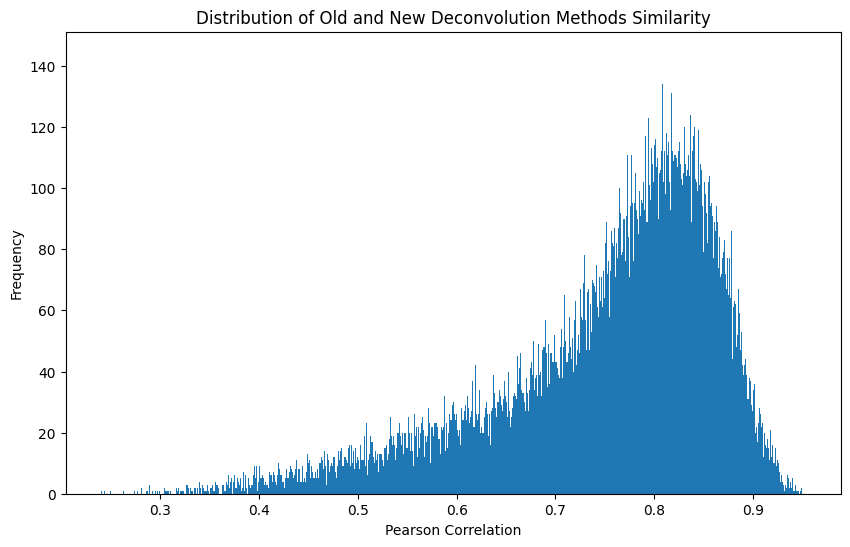

In [22]:
from numpy.linalg import norm
import matplotlib.pyplot as plt

def rowwise_cosine(A, B):
    num = np.sum(A * B, axis=1)
    denom = norm(A, axis=1) * norm(B, axis=1)
    return num / denom
def rowwise_pearsonr(A, B):
    A_centered = A - np.mean(A, axis=1, keepdims=True)
    B_centered = B - np.mean(B, axis=1, keepdims=True)
    num = np.sum(A_centered * B_centered, axis=1)
    denom = norm(A_centered, axis=1) * norm(B_centered, axis=1)
    return num / denom

similarities = rowwise_pearsonr(test_spks1, test_spks2)  # shape (30000,)
plt.figure(figsize=(10, 6))
plt.hist(similarities, bins=1000)
plt.xlabel('Pearson Correlation')
plt.ylabel('Frequency')
plt.title('Distribution of Old and New Deconvolution Methods Similarity')
plt.show()


In [ ]:
del test_spks1, test_spks2, similarities

## Multi Animals

In [29]:
unsup_animals_info = {
    'TX119': [['2023_12_14', '1'], ['2023_12_23', '1'], ['2023_12_24', '1']],
    'TX83': [['2022_08_17', '1'], ['2022_08_29', '1'], ['2022_08_31', '1']],
    'TX88': [['2022_06_13', '2'], ['2022_06_17', '2'], ['2022_06_20', '1']],
    'TX105': [['2022_10_08', '2'], ['2022_10_19', '2'], ['2022_10_21', '1']],
    'TX123': [['2023_12_21', '1'], ['2024_01_02', '1'], ['2024_01_03', '1']],
    'DR15': [['2022_10_09', '1'], ['2022_10_19', '1'], ['2022_10_20', '1']],
    'DR10': [['2022_07_12', '1'], ['2022_07_19', '1'], ['2022_07_21', '1']]
}

sup_animals_info ={
    'TX109':[['2023_03_27', '1'], ['2023_04_07', '1'], ['2023_04_18', '1']],
    'TX108':[['2023_03_13', '1'], ['2023_03_22', '1'], ['2023_03_25', '1']],
    'TX60':[['2021_04_10', '1'], ['2021_05_04', '1'], ['2021_06_07', '1']],
    'VR2':[['2021_03_20', '1'], ['2021_04_06', '1'], ['2021_04_11', '1']]
}


In [2]:
unsup_animals_info = {
    'TX88': [['2022_06_13', '2']]
}

In [3]:
def new_deconv (animals_info):
    for mname, sessions in animals_info.items():
        for datexp, blk in sessions:
            root1 = os.path.join('/mnt/z', mname, datexp, blk) if os.path.exists(os.path.join('/mnt/z', mname, datexp, blk)) else os.path.join('/mnt/x', mname, datexp, blk) 
            print(root1)
            results = {'spks': [], 'snrs': []}
            ops = np.load(os.path.join(root1, 'suite2p', 'plane0', 'ops.npy'), allow_pickle=True).item()
            Fs=np.round(ops['fs'])
            for n in range(20):
                print(n) if n % 5 == 0 else None
                ops = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'ops.npy'), allow_pickle=True).item()
                fr_per_folder = ops['frames_per_folder']
                F0 = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'F.npy'))[:, :fr_per_folder[0]]
                #Fn = dcnv.preprocess(F0, ops['baseline'], 2 * ops['win_baseline'],
                #                        ops['sig_baseline'], ops['fs'] , ops['prctile_baseline'])
                #F00 = F0 - Fn
                Fneu0 = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'Fneu.npy'))[:, :fr_per_folder[0]]
                F0 = F0 - 1*Fneu0
                #icell = np.load(os.path.join(root1, 'suite2p', 'plane%d'%n, 'iscell.npy'))[:,0]
                #F0 = F0[icell>.5]
                #F00 = F00[icell>.5,:]
                snr = 1  - .5 * np.var(np.diff(F0, axis=1), axis=1) / np.var(F0, axis=1)
                Fn = dcnv.preprocess(F0, ops['baseline'], 2 * ops['win_baseline'],
                            ops['sig_baseline'], ops['fs'] , ops['prctile_baseline'])
                #Fb = F0 - Fn
                #F0 = (F0 - Fb) / np.maximum(10, F00.mean(axis=1)).reshape(-1,1)
                #F0 = dcnv.oasis(F0, ops['batch_size'], ops['tau'], ops['fs'])
                F0 = udcnv.apply(Fn, Fs, 'sim_right_flex.th', batch_size=1)
                results['spks'].append(F0)
                results['snrs'].append(snr)
            # spks = np.load('Z:/data/Share/Qingqing/FX15_2024_05_13_1_07_d9.npy')
            np.save(f'/mnt/d/Users/sunr/Janelia_Project/MCLabRotation/data_newDeconv/spk/{mname}_{datexp}_{blk}_neural_data.npy', results)

In [4]:
new_deconv(unsup_animals_info)
#new_deconv(sup_animals_info)

/mnt/x/TX88/2022_06_13/2
0
5
10
15
